In [186]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import skimage
from skimage import io
from skimage.color import rgb2gray
from skimage import filters
import matplotlib as mpl
import cv2

In [187]:
#import image. Also normalize them
#setup the Ix and Iy, I_y = sobel_h, I_x = sobel_v
#Here the I_x and I_y would be using the gradient of the first image

#The aim is to solve through gradient descent, iteratively update 
#model parameters via vegative gradient (ui, vi), parameters are u and v
#gradient are the I s.
# Here calculate the flow vector u and v is our goal, since we will using 
#gradient decent method to find them iteratively, thus right here they will
#first be initialize as 0
im_path1 = 'people1_01.ppm'
im_path2 = 'people1_02.ppm'
im1 = io.imread(im_path1)
im2 = io.imread(im_path2)
im1 = rgb2gray(im1)
im2 = rgb2gray(im2)

#im1 = cv2.normalize(im1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#im2 = cv2.normalize(im2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

im1 = im1 / 255
im2 = im2 / 255
#pre compute, Ix and Iy, 
Ix = filters.sobel_v(im1)
Iy = filters.sobel_h(im1)
It = im1 - im2
#init u and v
u = np.zeros([im1.shape[0],im1.shape[1]])
v = np.zeros([im1.shape[0],im1.shape[1]])

print (len(im1))
print (len(u))

480
480


In [188]:
def uv_average (u, v, row, column, is_u):
    out_average = 0
    #calculate average for u
    if (is_u):
        out_average = 1/4 * (u[row + 1, j] + u[row - 1, j] + u[row, column + 1] + u[row, column - 1])
    #calculate average for v
    else:
        out_average = 1/4 * (v[row + 1, j] + v[row - 1, j] + v[row, column + 1] + v[row, column - 1])   
    return out_average    

In [189]:
def Horn_Schunck (im1, im2, u, v, row, column, lam):
    u_mean = uv_average(u, v, row, column, True)
    v_mean = uv_average(u, v, row, column, False)
    new_u = u_mean - (((Ix[row, column] * u_mean + Iy[row, column] * v_mean + \
                       It[row, column]) * Ix[row, column]) / ((lam) ** (-1) + Ix[row, column] ** 2 \
                                                              + Iy[row, column]))
    new_v = v_mean - (((Ix[row, column] * u_mean + Iy[row, column] * v_mean + \
                       It[row, column]) * Iy[row, column]) / ((lam) ** (-1) + Ix[row, column] ** 2 \
                                                              + Iy[row, column]))
    return new_u, new_v

In [190]:
#Repeat iterations.
row, column = im1.shape
lam = 5
iteration = 40
for iter in range (iteration):
    #for image edge solution, as image is not padded
    for i in range (1, row - 1):
        for j in range (1, column - 1):
            #doing iteration in the same time updating the parameters u and v
            u[i, j], v[i, j] = Horn_Schunck (im1, im2, u, v, i, j, lam)
            #partial_x, partial_y = sum_derivative(im1, im2, u, v, i, j, lam)
            #print (u[i, j], v[i, j])           
print (u)
print (v)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.05435981e-07 -3.10865346e-07 ... -2.84348988e-06
  -1.36842756e-06  0.00000000e+00]
 [ 0.00000000e+00 -1.10147352e-06 -1.47157443e-06 ... -5.54299048e-06
  -2.66813783e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.97848018e-07  3.48464416e-07 ... -7.65521794e-07
  -8.41742017e-07  0.00000000e+00]
 [ 0.00000000e+00  9.31616952e-08  2.27586319e-08 ... -4.43482011e-07
  -5.25931683e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.88639321e-07  1.71508953e-07 ... -4.65122469e-07
  -2.22101638e-07  0.00000000e+00]
 [ 0.00000000e+00 -3.92747163e-07 -4.15929514e-07 ... -8.07018442e-07
  -3.88480855e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.33018045e-06  2.0121504

480
640
(480, 640)
[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [477. 477. 477. ... 477. 477. 477.]
 [478. 478. 478. ... 478. 478. 478.]
 [479. 479. 479. ... 479. 479. 479.]]


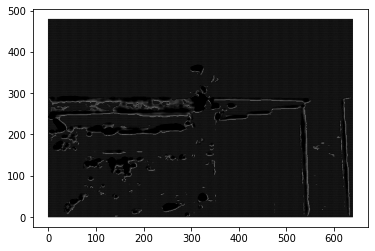

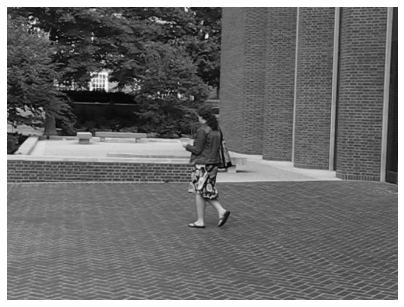

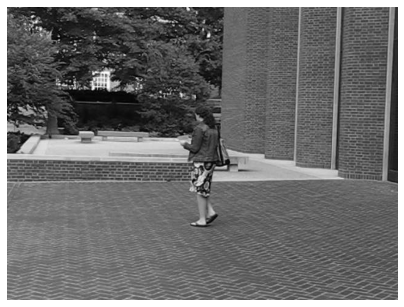

In [213]:
#result testing.
#u is the horizontal change, v is the vertical change
#vector_im = partial_x * u + partial_y * v + It  
print (len(y))
print (len(im1[0]))
print (im1.shape)
x = np.zeros([im1.shape[0],im1.shape[1]])
y = np.zeros([im1.shape[0],im1.shape[1]])
for i in range (0, row):
    count = 0
    for j in range (0, column):
        x[i, j] = count
        y[i, j] = i
        count += 1
print (y)
                
plt.quiver(x, y, u, v)
plt.show()
#vector_im = vector_im * 255            

fig1 = plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(im1, cmap='gray')
plt.show()  
fig1 = plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(im2, cmap='gray')
plt.show() 


[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]


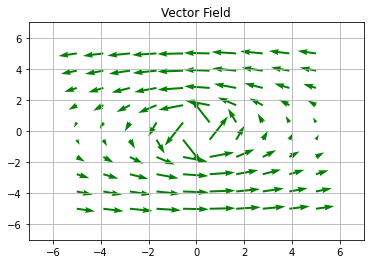

In [192]:

# Import required modules
import numpy as np
import matplotlib.pyplot as plt
  
# Meshgrid
x, y = np.meshgrid(np.linspace(-5, 5, 10), 
                   np.linspace(-5, 5, 10))
  
# Directional vectors
u1 = -y/np.sqrt(x**2 + y**2)
v1 = x/(x**2 + y**2)

print (x)
print (len(u[1]))
print (len(x[1]))
print (u1)

# Plotting Vector Field with QUIVER
plt.quiver(x, y, u1, v1, color='g')
plt.title('Vector Field')
  
# Setting x, y boundary limits
plt.xlim(-7, 7)
plt.ylim(-7, 7)
  
# Show plot with gird
plt.grid()
plt.show()

In [125]:
def sum_derivative (im1, im2, u, v, row, column, lam):
    u_mean = uv_average(u, v, row, column, True)
    v_mean = uv_average(u, v, row, column, False)
    #print (u_mean)
    dE_u = 2 * (u[row, column] - u_mean) + 2 * lam * \
    (Ix[row, column] * u[row, column] + Iy[row, column] * v[row, column] + It[row, column]) * Ix[row, column]
    dE_v = 2 * (v[row, column] - v_mean) + 2 * lam * \
    (Ix[row, column] * u[row, column] + Iy[row, column] * v[row, column] + It[row, column]) * Iy[row, column]
    
    return dE_u, dE_v

In [ ]:
def create_gradient_magnitude(horizontal_d, vertical_d):
    gradient_magnitude_im = np.sqrt(np.square(derivative_horizontal_image) + \
                                    np.square(derivative_vertical_image))
    #gradient_magnitude_im *= (255.0 / gradient_magnitude_im.max())
    return gradient_magnitude_im

In [ ]:
# u and v are distance that moved. You can also call them flow vectors. They are 
#our target to solve.
def smoothness (im1, im2, row, column):
    u = im1
    v = im2
    ouputEs = 1/4 * ((u[row, column] - u[row + 1, column]) ** 2 + \
                     (u[row, column] - u[row, column + 1]) ** 2 + \
                     (v[row, column] - v[row + 1, column]) ** 2 + \
                     (v[row, column] - v[row, column + 1]) ** 2)
    return outputEs

In [ ]:
# One big assumption to use this formula would be two images frame should be under the 
#exact same lighting condition.
def brightness_constancy (im1, im2, row, column, gradient):
    u = im1
    v = im2
    Ed_u = (Ix[row, column] * u[row, column] + Iy[row, column] * u[row, column] + It[row, column])
    return Ed_u        